In [118]:
import pandas as pd
import seaborn as sns
import ExperimentData

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
loader = ExperimentData.Loader()
loader.getDifiScores()

In [103]:
sessions_type1 = ['vhmb74qv']
sessions_type3 = ['5ydhsfg6', '89ykytnu', 'ef0hzbwg'] #Priming
sessions_type4 = ['3k2emuiz', '20pmmmna'] #No Priming

def getDifiScores(sessions):
    
    def filterSession(df, sessions):
        mask = df.index.get_level_values('session.code').isin(sessions)
        return df[mask]
    
    pgg_cols = ['session.code', 'participant.code', 'player.distanceScale', 'player.overlapScale']
    ana_cols = ['session.code', 'participant.code', 'player.distanceScale_after', 'player.overlapScale_after']
    ia_cols = ['session.code', 'participant.code', 'player.distanceScale_before', 'player.overlapScale_before']

    Pgg = loader.getPublicGoodsGame()[pgg_cols].set_index(['session.code', 'participant.code'])
    Anagrams = loader.getAnagramsGame()[ana_cols].set_index(['session.code', 'participant.code'])
    Inst_Anagrams = loader.getInstructionsAnagrams()[ia_cols].set_index(['session.code', 'participant.code'])

    Difi = pd.concat([Inst_Anagrams, Anagrams, Pgg],axis=1)
    Difi.columns = ['base-distance', 'base-overlap', 'priming-dist', 'priming-overlap', 'pgg-dist', 'pgg-overlap']
    Difi = filterSession(Difi, sessions).dropna(how='all')
    
    return Difi

In [124]:
Difi_priming = getDifiScores(sessions_type3).dropna()
Difi_priming['key'] = 'priming'
Difi_noPriming = getDifiScores(sessions_type4).dropna(axis=1, how='all').dropna()
Difi_noPriming['key'] = 'no priming'

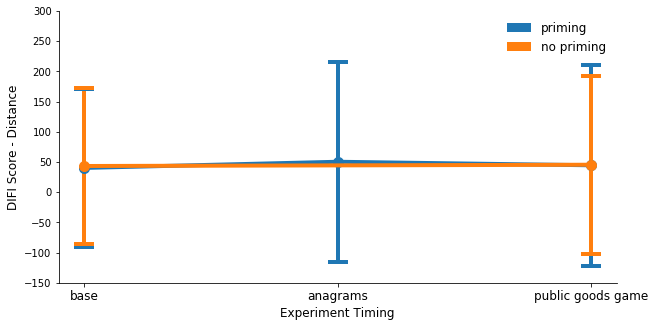

In [288]:
#plt.figure(figsize=(10,5))
fig, ax = plt.subplots(figsize=(10,5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

means = Difi_priming.iloc[:,[0,2,4]].mean()
stds = Difi_priming.iloc[:,[0,2,4]].std()*2.
plt.errorbar([0,1,2],means.values,yerr=stds.values, capsize = 10,marker='o', markersize=10, elinewidth=4, capthick=4, linewidth=4, label='priming')

means = Difi_noPriming.iloc[:,[0,2]].mean()
stds = Difi_noPriming.iloc[:,[0,2]].std() * 2.
plt.errorbar([0,2],means.values,yerr=stds.values, capsize= 10,marker='o', markersize=10, elinewidth=4, capthick=4, linewidth=4, label='no priming')

plt.ylim([-150,300])
plt.ylabel('DIFI Score - Distance', fontsize=12)
plt.xticks([0,1,2],['base', 'anagrams', 'public goods game'], fontsize=12)
plt.xlabel('Experiment Timing', fontsize=12)

p1 = plt.Rectangle((0, 0), 1, 1, fc=sns.color_palette()[0])
p2 = plt.Rectangle((0, 0), 1, 1, fc=sns.color_palette()[1])
plt.legend([p1,p2], ["priming","no priming"], frameon=False, fontsize = 12)

plt.savefig('./output/difi-distance.png')

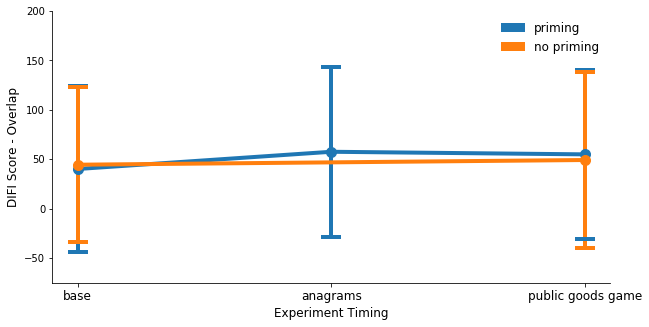

In [289]:
fig, ax = plt.subplots(figsize=(10,5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

means = Difi_priming.iloc[:,[1,3,5]].mean()
stds = Difi_priming.iloc[:,[1,3,5]].std()*2.
plt.errorbar([0,1,2],means.values,yerr=stds.values, capsize = 10,marker='o', markersize=10, elinewidth=4, capthick=4, linewidth=4)

means = Difi_noPriming.iloc[:,[1,3]].mean()
stds = Difi_noPriming.iloc[:,[1,3]].std() * 2.
plt.errorbar([0,2],means.values,yerr=stds.values, capsize= 10, marker='o', markersize=10, elinewidth=4, capthick=4, linewidth=4)

plt.ylim([-75,200])
plt.ylabel('DIFI Score - Overlap', fontsize=12)
plt.xticks([0,1,2],['base', 'anagrams', 'public goods game'], fontsize=12)
plt.xlabel('Experiment Timing', fontsize=12)

p1 = plt.Rectangle((0, 0), 1, 1, fc=sns.color_palette()[0])
p2 = plt.Rectangle((0, 0), 1, 1, fc=sns.color_palette()[1])
plt.legend([p1,p2], ["priming", "no priming"], frameon=False, fontsize = 12)

plt.savefig('./output/difi-overlap.png')